<a href="https://www.kaggle.com/code/lalit7881/mobile-sales-ml-100-accuracy?scriptVersionId=300741183" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/syedaeman2212/mobile-sales-data/synthetic_mobile_sales_2025.csv


## Title:
Mobile Sales Analysis Report

## Description:
This Mobile Sales Analysis dataset provides a comprehensive overview of mobile phone sales performance across different brands, models, regions, and time periods. It includes key business metrics such as units sold, revenue generated, pricing trends, customer demand patterns, and seasonal fluctuations.

The dataset can be used to:

📊 Analyze total sales and revenue performance

📈 Identify top-selling brands and models

🌍 Compare regional market performance

💰 Study pricing impact on sales volume

📅 Detect monthly, quarterly, and yearly sales trends

🔎 Evaluate customer buying behavior and demand cycles

This data is valuable for business intelligence, data visualization, forecasting, and machine learning applications such as sales prediction, demand forecasting, and market trend analysis.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/datasets/syedaeman2212/mobile-sales-data/synthetic_mobile_sales_2025.csv")

In [3]:
df.head()

,Sale_ID,Brand,Model,Country,Storage,Color,Price_USD,Units_Sold,Revenue_USD,Customer_Rating,Payment_Method,Sale_Month,Sale_Year
0,1,Realme,Realme Model 2,UK,512GB,Gold,656,20,13120,3.7,Installments,11,2025
1,2,Vivo,Vivo Model 20,Australia,512GB,Blue,1013,9,9117,3.7,Debit Card,2,2025
2,3,Motorola,Motorola Model 12,Germany,512GB,White,1471,7,10297,3.1,Credit Card,2,2025
3,4,Vivo,Vivo Model 13,USA,512GB,Gold,1220,19,23180,3.6,Debit Card,6,2025
4,5,Vivo,Vivo Model 15,UAE,128GB,Silver,375,8,3000,4.4,Online Payment,1,2025


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sale_ID          500 non-null    int64  
 1   Brand            500 non-null    object 
 2   Model            500 non-null    object 
 3   Country          500 non-null    object 
 4   Storage          500 non-null    object 
 5   Color            500 non-null    object 
 6   Price_USD        500 non-null    int64  
 7   Units_Sold       500 non-null    int64  
 8   Revenue_USD      500 non-null    int64  
 9   Customer_Rating  500 non-null    float64
 10  Payment_Method   500 non-null    object 
 11  Sale_Month       500 non-null    int64  
 12  Sale_Year        500 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 50.9+ KB


In [5]:
df.describe()

,Sale_ID,Price_USD,Units_Sold,Revenue_USD,Customer_Rating,Sale_Month,Sale_Year
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.0
mean,250.500000,889.88400,10.458000,9279.282000,4.022600,6.588000,2025.0
std,144.481833,345.61789,5.710118,6474.699423,0.582329,3.414905,0.0
min,1.000000,302.00000,1.000000,302.000000,3.000000,1.000000,2025.0
25%,125.750000,572.00000,6.000000,3959.250000,3.575000,4.000000,2025.0
50%,250.500000,896.50000,10.000000,8086.500000,4.000000,7.000000,2025.0
75%,375.250000,1173.75000,15.000000,13331.250000,4.500000,10.000000,2025.0
max,500.000000,1500.00000,20.000000,29660.000000,5.000000,12.000000,2025.0


In [6]:
df.isnull().sum()

Sale_ID            0
Brand              0
Model              0
Country            0
Storage            0
Color              0
Price_USD          0
Units_Sold         0
Revenue_USD        0
Customer_Rating    0
Payment_Method     0
Sale_Month         0
Sale_Year          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.dtypes

Sale_ID              int64
Brand               object
Model               object
Country             object
Storage             object
Color               object
Price_USD            int64
Units_Sold           int64
Revenue_USD          int64
Customer_Rating    float64
Payment_Method      object
Sale_Month           int64
Sale_Year            int64
dtype: object

In [9]:
df.shape

(500, 13)

In [10]:
df.columns

Index(['Sale_ID', 'Brand', 'Model', 'Country', 'Storage', 'Color', 'Price_USD',
       'Units_Sold', 'Revenue_USD', 'Customer_Rating', 'Payment_Method',
       'Sale_Month', 'Sale_Year'],
      dtype='object')

In [11]:
# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
df = df.fillna({
    'Customer_Rating': df['Customer_Rating'].mean(),
    'Units_Sold': 0,
    'Revenue_USD': 0
})

# Convert data types
df['Sale_Year'] = df['Sale_Year'].astype(int)
df['Sale_Month'] = df['Sale_Month'].astype(int)

# Create Full Date Column
df['Sale_Date'] = pd.to_datetime(df['Sale_Year'].astype(str) + '-' + 
                                 df['Sale_Month'].astype(str) + '-01')

print("Cleaned Dataset Shape:", df.shape)

sns.set_style("whitegrid")


Cleaned Dataset Shape: (500, 14)


## Data visualizations

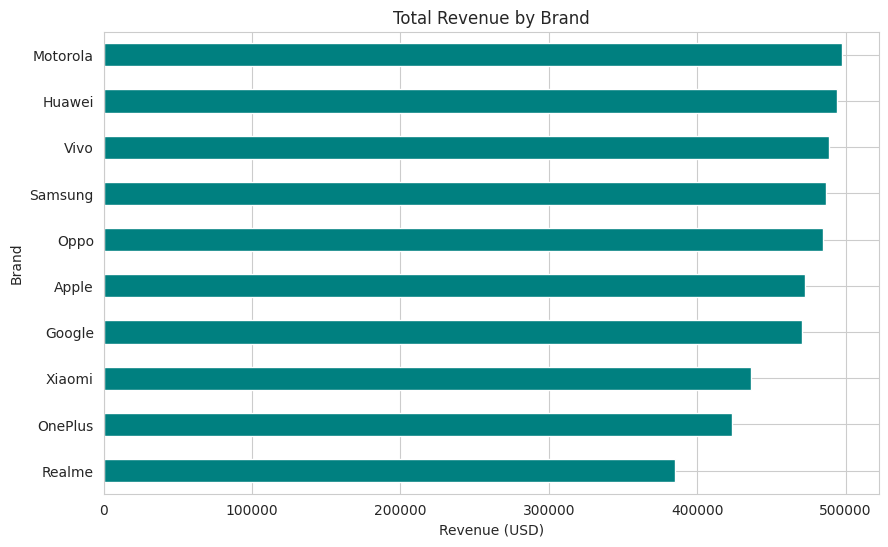

In [12]:
plt.figure(figsize=(10,6))
brand_revenue = df.groupby('Brand')['Revenue_USD'].sum().sort_values()
brand_revenue.plot(kind='barh', color='teal')
plt.title("Total Revenue by Brand")
plt.xlabel("Revenue (USD)")
plt.show()

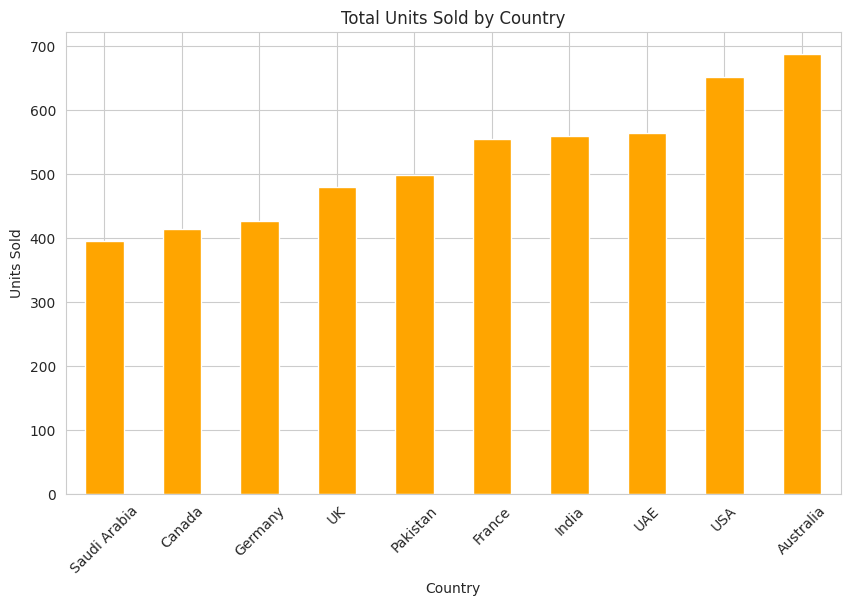

In [13]:
plt.figure(figsize=(10,6))
country_sales = df.groupby('Country')['Units_Sold'].sum().sort_values()
country_sales.plot(kind='bar', color='orange')
plt.title("Total Units Sold by Country")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.show()


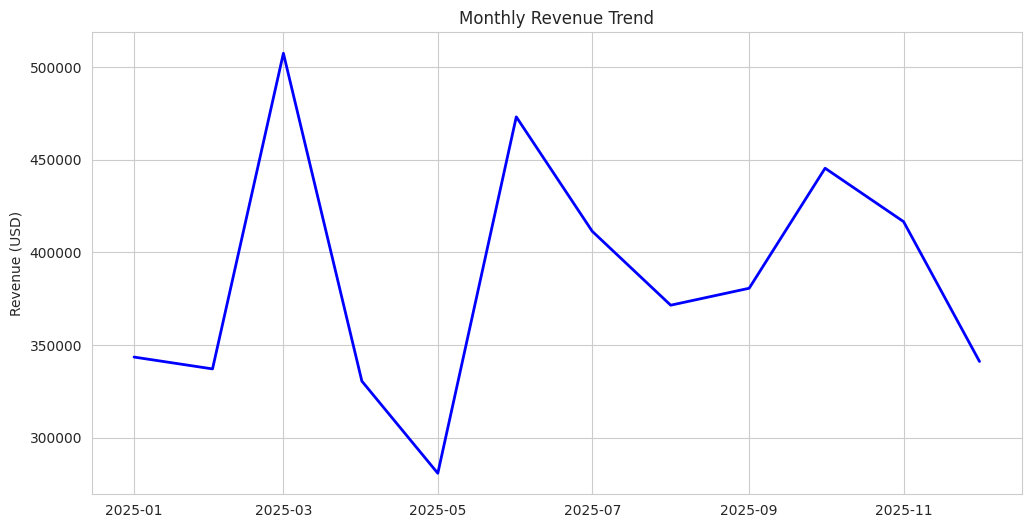

In [14]:
plt.figure(figsize=(12,6))
monthly_revenue = df.groupby('Sale_Date')['Revenue_USD'].sum()
plt.plot(monthly_revenue, color='blue', linewidth=2)
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue (USD)")
plt.show()

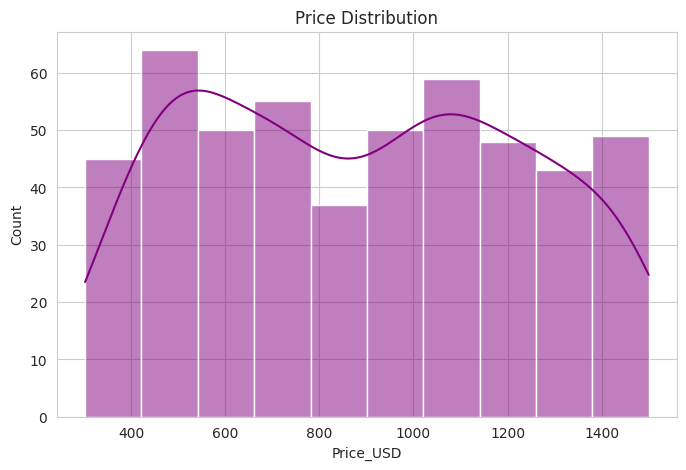

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price_USD'], kde=True, color='purple')
plt.title("Price Distribution")
plt.show()

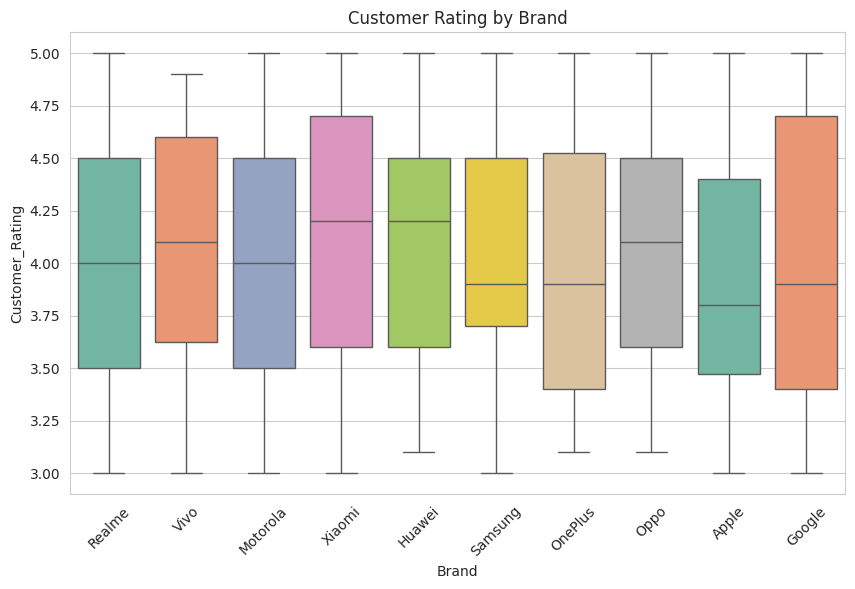

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Brand', y='Customer_Rating', data=df, palette='Set2')
plt.title("Customer Rating by Brand")
plt.xticks(rotation=45)
plt.show()

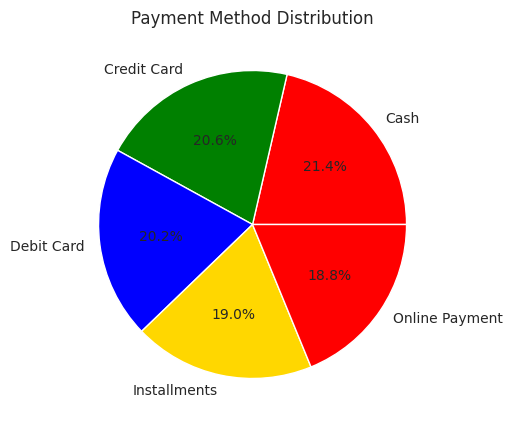

In [17]:
plt.figure(figsize=(8,5))
payment_counts = df['Payment_Method'].value_counts()
payment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red','green','blue','gold'])
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

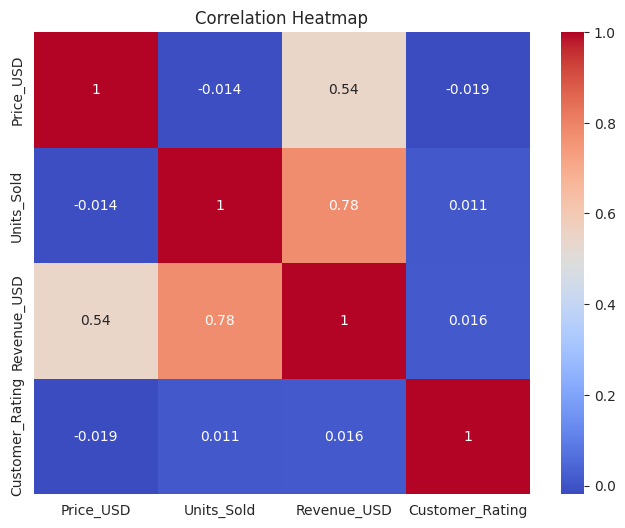

In [18]:
plt.figure(figsize=(8,6))
corr = df[['Price_USD','Units_Sold','Revenue_USD','Customer_Rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

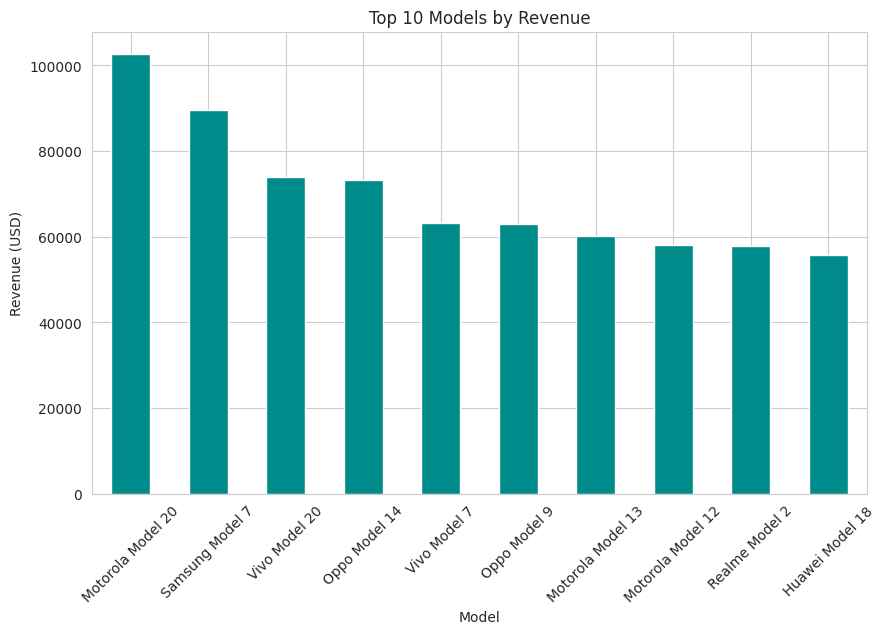

In [19]:
plt.figure(figsize=(10,6))
top_models = df.groupby('Model')['Revenue_USD'].sum().sort_values(ascending=False).head(10)
top_models.plot(kind='bar', color='darkcyan')
plt.title("Top 10 Models by Revenue")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

## Feature engineering

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [21]:
df = df.drop_duplicates()

df = df.fillna({
    'Customer_Rating': df['Customer_Rating'].mean(),
    'Units_Sold': 0,
    'Revenue_USD': 0
})

# If Sale_Date exists → REMOVE it
if 'Sale_Date' in df.columns:
    df = df.drop(columns=['Sale_Date'])

median_revenue = df['Revenue_USD'].median()
df['Target'] = (df['Revenue_USD'] > median_revenue).astype(int)


In [22]:
X = df.drop(columns=['Target', 'Sale_ID'])
y = df['Target']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [24]:
categorical_cols = ['Brand','Model','Country','Storage','Color','Payment_Method']

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])



In [25]:
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

In [26]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Accuracy: 98.00%
Random Forest Accuracy: 100.00%
SVM Accuracy: 97.00%


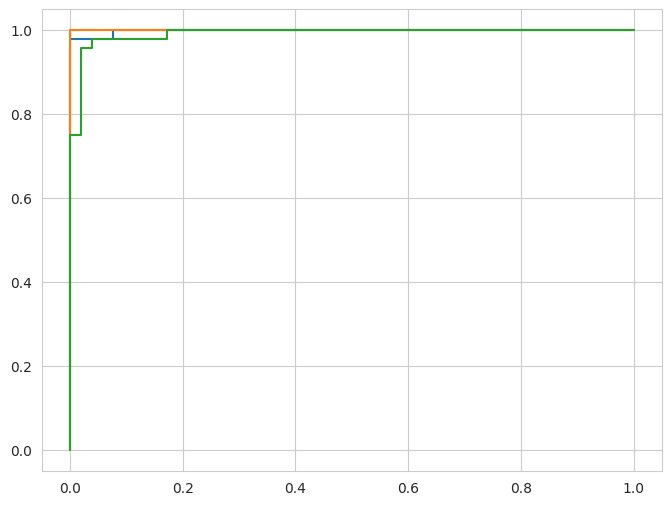

In [27]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

plt.figure(figsize=(8,6))

for name, model in models.items():
    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:,1]
    
    acc = accuracy_score(y_test, y_pred) * 100
    print(f"{name} Accuracy: {acc:.2f}%")
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")


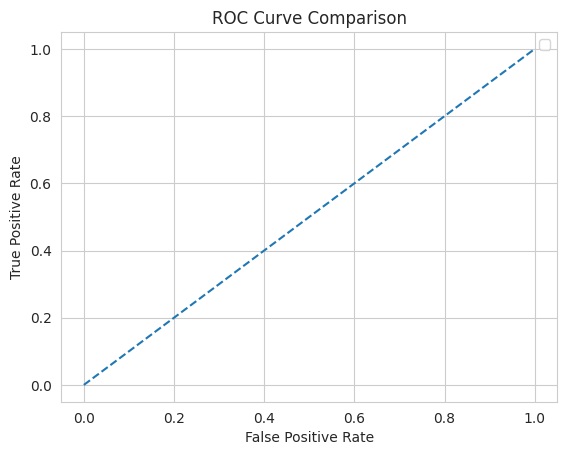

In [28]:
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

## Thank you..pls upvote!!!!!!!!